In [1]:
%matplotlib inline
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tq
from PIL import Image
import keras
import pickle
from keras.models import load_model
from keras.models import Sequential
from keras.models import Model
from keras.utils.layer_utils import layer_from_config
from keras.layers import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import load_img, img_to_array, random_rotation, flip_axis, array_to_img
import itertools
import gc
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.inception_v3 import preprocess_input as preprocess_input_inception
from keras.models import model_from_json
from keras.applications.inception_v3 import InceptionV3
from heatmap import to_heatmap
from heatmap import synset_to_dfs_ids
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing import image
import scipy
from heatmaps_generator import *
import os
import glob
import cv2
# To see the training error in real time.
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')
from keras.applications.inception_v3 import InceptionV3
from keras.applications.xception import Xception
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model
from keras.models import Sequential
from keras.layers import *
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras import callbacks
remote = callbacks.RemoteMonitor(root='http://localhost:9000')
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from keras.utils.visualize_util import plot
from keras.optimizers import *
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
import csv
from sklearn.metrics import log_loss
from PIL import Image
import os
import random
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers.convolutional import Convolution2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K
K.set_image_dim_ordering('th')
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.models import model_from_json
from keras.applications.resnet50 import preprocess_input, decode_predictions
from convnetskeras.customlayers import Softmax4D
import gc
from convnetskeras.convnets import preprocess_image_batch, convnet
from convnetskeras.imagenet_tool import synset_to_dfs_ids
import PIL
from PIL import Image,ImageFilter, ImageDraw
import matplotlib.pyplot as plt
import numpy as np
import numpy.random as rnd
from matplotlib.patches import Ellipse
from numpy.linalg import eig, inv
import scipy
from scipy import ndimage
from skimage import data, io, filters
from skimage import data, img_as_float
from skimage import exposure
import math
from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
import skimage
import collections
import json
import pickle

Using Theano backend.
Using gpu device 0: GeForce GTX 960M (CNMeM is enabled with initial size: 80.0% of memory, cuDNN 5105)


In [3]:
def change_resolution_25p_up(x):
    x = array_to_img(x)
    size = [int(a*1.25) for a in x.size] 
    x = scipy.misc.imresize(x, size[::-1], interp='bilinear', mode=None)
    return image.img_to_array(x)

def change_resolution_25p_down(x):
    x = array_to_img(x)
    size = [int(a*0.75) for a in x.size] 
    x = scipy.misc.imresize(x, size[::-1], interp='bilinear', mode=None)
    return image.img_to_array(x)

def flip_horizontal_img(x):
    return flip_axis(x, 2)
def flip_horizontal_hm(x):
    return flip_axis(x, 1)

def flip_vertical_img(x):
    return flip_axis(x, 1)
def flip_vertical_hm(x):
    return flip_axis(x, 0)

def rotate_img_15_up(x):
    x = array_to_img(x)
    x = x.rotate(15)
    return img_to_array(x)
def rotate_hm_15_down(x):
    x = array_to_img(np.expand_dims(x, axis=0))
    x = x.rotate(-15)
    return img_to_array(x)[0]

In [4]:
transformations = [lambda x:x, 
                   flip_horizontal_img,
                   flip_vertical_img,
                   rotate_img_15_up,
                   change_resolution_25p_up,
                   change_resolution_25p_down]
inverses = [lambda x:x, 
            flip_horizontal_hm,
            flip_vertical_hm,
            rotate_hm_15_down,
            lambda x: x,
            lambda x: x]
transformations_names = ["identity", 
                         "horizontal flip",
                         "vertical flip",
                         "rotate 15",
                         "resolution 25 up"
                         "resolution 25 down"]

In [5]:
paths = get_all_images(regex = "./heatmaps/pickle/*/*/*/*.jpg")
paths[0]

'./heatmaps/pickle/ResNet50/horizontal flip/ALB/img_00003.jpg'

In [6]:
paths[0].split("/")[5]

'ALB'

In [7]:
dic_paths = {}
for path in paths:
    key = path.split("/")[3] + path.split("/")[4]
    add_to_dic_list(key, path, dic_paths)
    
for key, value in dic_paths.items():
    print(key + ": " + str(len(value)))
    
nb_samples = 1000000
keys_to_delete=[]
for key, value in dic_paths.items():
    string = key + " has " + str(len(value)) +" in it. Delete? [Y/nothing]"
    answer = input(string)
    if answer != "":
        keys_to_delete.append(key)
    else:
        nb_samples = min(nb_samples,len(value))

for key in keys_to_delete:
    dic_paths.pop(key)

VGG16resolution 25 up: 1
ResNet50identity: 3777
VGG19vertical flip: 211
VGG16vertical flip: 2
ResNet50vertical flip: 3777
ResNet50horizontal flip: 3777
VGG19rotate 15: 211
VGG19horizontal flip: 211
VGG19resolution 25 up: 211
VGG16identity: 2
ResNet50resolution 25 up: 3777
VGG16resolution 25 down: 1
VGG16rotate 15: 2
ResNet50rotate 15: 3777
VGG16horizontal flip: 2
ResNet50resolution 25 down: 3777
VGG19resolution 25 down: 211
VGG19identity: 211
VGG16resolution 25 up has 1 in it. Delete? [Y/nothing]n
ResNet50identity has 3777 in it. Delete? [Y/nothing]
VGG19vertical flip has 211 in it. Delete? [Y/nothing]n
VGG16vertical flip has 2 in it. Delete? [Y/nothing]n
ResNet50vertical flip has 3777 in it. Delete? [Y/nothing]
ResNet50horizontal flip has 3777 in it. Delete? [Y/nothing]
VGG19rotate 15 has 211 in it. Delete? [Y/nothing]n
VGG19horizontal flip has 211 in it. Delete? [Y/nothing]n
VGG19resolution 25 up has 211 in it. Delete? [Y/nothing]n
VGG16identity has 2 in it. Delete? [Y/nothing]n
ResN

In [8]:
import collections
import json
jsons = [f for f in os.listdir('./') if '.json' in f and 'labels' in f]
print(jsons)
data_json = collections.defaultdict(int)
for fjson in jsons:
    with open(fjson,'r+') as f:
        name = fjson.split('_')[0].upper()
        data_json[name] = collections.defaultdict(list)
        labels = json.load(f)
        for label in labels:
            img_name = label['filename'].split('/')[-1]
            data_json[name][img_name] = label['annotations'] 
print(data_json.keys())

['alb_labels.json', 'bet_labels.json', 'dol_labels.json', 'lag_labels.json', 'other_labels.json', 'shark_labels.json', 'yft_labels.json']
dict_keys(['YFT', 'ALB', 'DOL', 'LAG', 'SHARK', 'OTHER', 'BET'])


In [36]:
import operator
def n_img(img):
    img = img - img.min()
    return img/img.max()
def min(a,b):
    if a > b:
        return b
    else:
        return a
def filter_rects(rects,th_x,th_y):
    rects_L = len(rects)
    area = []
    for i,rect in enumerate(rects) : 
        w = rect['width']
        h = rect['height']    
        area.append((i,h*w))
    tmp = sorted(area,key=operator.itemgetter(1),reverse=True)
    rects = [{'x': rects[tmp[i][0]]['x'], 'height': rects[tmp[i][0]]['height'], 'width': rects[tmp[i][0]]['width'], 'y': rects[tmp[i][0]]['y']} for i in range(min(BEST_RECTS,rects_L)) if rects[tmp[i][0]]['height']*rects[tmp[i][0]]['width'] > th_x*th_y]
    for i in range(MAX_FISH-len(rects)):
        rects.append({'x': 0, 'height': 0, 'width': 0, 'y': 0})
    return rects
def transform_to_rect(rects,size,input=True):
    no_rect = 0
    if input:
        D = 15
        th_x = size[0]/D
        th_y = size[1]/D
        output = []
        no_rect = 0
        L = len(rects)
        if len(rects) > 0 :
            x_r = 100/size[0]
            y_r = 100/size[1]
            #rects = filter_rects(rects,th_x,th_y)
            if L < MAX_FISH:
                for i,rect in enumerate(rects):
                    x = rect['x']*x_r
                    y = rect['y']*y_r
                    w = rect['width']*x_r
                    h = rect['height']*y_r
                    output.append(x)
                    output.append(y)
                    output.append(w)
                    output.append(h)
                for i in range(MAX_FISH-L):#MAX_FISH - len(output)
                    for j in range(4):
                        output.append(no_rect)
                return output
            else:
                for i,rect in enumerate(rects):
                    if i < MAX_FISH:
                        x = rect['x']*x_r
                        y = rect['y']*y_r
                        w = rect['width']*x_r
                        h = rect['height']*y_r
                        output.append(x)
                        output.append(y)
                        output.append(w)
                        output.append(h)
                return output
        else:
            return [no_rect for i in range(MAX_FISH*4)]        
    else:
        return [no_rect for i in range(MAX_FISH*4)] 

In [37]:
from PIL import Image
from keras.preprocessing import image
import PIL
t = tq(total=nb_samples)
train_path = './train/train/'
heatmaps = []
list_transformations = []
masks = []
MAX_FISH = 6
BEST_RECTS = 3
sizes = collections.defaultdict()
done = False # If we've already loaded the masks
count = 0
count1=0
for key, value in dic_paths.items():
    print(count,count1)
    list_transformations.append(key)
    h = []
    for path in value[:nb_samples]:
        real_img_path = train_path+path.split("/")[5]+'/'+path.split("/")[6]
        size = image.load_img(real_img_path).size
        sizes[real_img_path]=size
        try:
            masks.append(transform_to_rect(data_json[path.split("/")[5]][path.split("/")[6]],size,True))
        except:
            masks.append(transform_to_rect([],size,False))
        with open(path, "rb") as f:
            img = pickle.load(f)
            h.append(n_img(img))
        t.update()
        count1+=1
        #break
    heatmaps.append(h)
    t.clear()
    done = True
    count+=1
    #break
t.close()

0 0
1 3777
2 7554
3 11331
4 15108
5 18885



In [38]:
import pickle 
data = [heatmaps,masks,sizes]
with open('data_heatmaps.g','wb') as f:
    pickle.dump(data, f, -1)

In [4]:
with open('data_heatmaps.g','rb') as f:
    unpickler = pickle.Unpickler(f);
    data_load = unpickler.load();
heatmaps = data_load[0]
masks = data_load[1]
sizes = data_load[2]

In [5]:
X = np.swapaxes(np.array(heatmaps), 0,1)
Y = np.array(masks)

In [6]:
#list_transformations

NameError: name 'list_transformations' is not defined

In [7]:
print(X.shape)
print(Y.shape)

(3777, 6, 100, 100)
(22662, 24)


In [14]:
Z = np.mean(X, axis=1)
Z = np.expand_dims(Z, axis=1)
Z.shape
print(Z.shape)
B = np.zeros((len(Z),1,100,100))

(3777, 1, 100, 100)


In [15]:
import numpy
MAX_FISH = 6
# x is your dataset
alpha = 0.8
z_L = len(Z)
M = MAX_FISH*z_L
nb = int(alpha*z_L)
print(nb,M)
numpy.random.shuffle(Z)
X_train, X_test = Z[:nb,:,:], Z[nb:z_L,:,:]
Y_train, Y_test = Y[:nb,:], Y[nb:z_L,:]
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

3021 22662
(3021, 1, 100, 100) (3021, 24)
(756, 1, 100, 100) (756, 24)


In [28]:
# PREPARE MODEL
from keras.layers import merge, Input
from keras.regularizers import l2, activity_l2
MAX_FISH = 6
BEST_RECTS = 3
def baseline_model():
    # create model
    model = Sequential()
    model.add(Activation(activation="relu", input_shape=(1,100,100)))
    model.add(Dropout(0.1))

    model.add(Convolution2D(64, 3, 3,init='normal', border_mode='same', activation='relu'))
    model.add(Convolution2D(64, 3, 3,init='normal', border_mode='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))
 
    model.add(Convolution2D(128, 3, 3,init='normal', border_mode='same', activation='relu'))
    model.add(Convolution2D(128, 3, 3,init='normal', border_mode='same', activation='relu'))
    model.add(MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(Flatten())
    model.add(Dense(512,init='normal'))
    
    model.add(Dense(128,init='normal'))
    model.add(Dropout(0.05))
    model.add(Dense(MAX_FISH*4,init='normal'))
    model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.01, rho=0.9, epsilon=1e-08, decay=0.0))
    return model
def return_resnet50(input_shape,input_tensor,include_top=False):
    if K.image_dim_ordering() == 'th':
        if include_top:
            input_shape = (3, 224, 224)
        else:
            input_shape = (3, None, None)
    else:
        if include_top:
            input_shape = (224, 224, 3)
        else:
            input_shape = (None, None, 3)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor)
        else:
            img_input = input_tensor
    # Block 1
    x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block1_conv1')(img_input)
    x = Convolution2D(32, 3, 3, activation='relu', border_mode='same', name='block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block2_conv1')(x)
    x = Convolution2D(64, 3, 3, activation='relu', border_mode='same', name='block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    x = GlobalAveragePooling2D()(x)
    x = Dense(64)(x)
    x = Dense(MAX_FISH*4)(x)
    model = Model(img_input, x)
    model.compile(loss='mean_squared_error', optimizer=Adam(lr=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0))
    return model

In [29]:
gc.collect()
#model = return_resnet50(input_shape=(3,197,197),input_tensor=None)
model = baseline_model()
model.fit(X_train, Y_train,
          batch_size=16, nb_epoch=25,callbacks=[remote],verbose=0,validation_data=(X_test, Y_test), shuffle=True)

In [30]:
import math
results = model.predict(X_test, batch_size=10)
scores = model.evaluate(X_test, Y_test, verbose=0)
print(math.sqrt(scores))

7.679791519940649


In [31]:
def plot_rect(img,rects,rights):
    import matplotlib.pyplot as plt
    import matplotlib.patches as patches
    from PIL import Image
    import numpy as np
    fig,ax = plt.subplots(1)
    ax.imshow(img[0])
    dist0=math.fabs(np.subtract(rects,rights).sum())
    if len(rects) > 4 :
        rects = rects.reshape((MAX_FISH,4))
    else:
        rects = np.array([rects])
    if len(rights) > 4 :
        rights = rights.reshape((MAX_FISH,4))
    else:
        rights = np.array([rights])
    print(rects)
    for rect in rects:
        #rect*=100
        x = rect[0]
        y = rect[1]
        w = rect[2]
        h = rect[3]
        condition = w*h > 50 or (w>7 and h>5) or (w>5 and h>7)
        print(  condition)
        if condition:
            print(x,y,w,h)
            rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='red')
            ax.add_patch(rect)
        else:
            if w > 0 or h > 0:
                print(x,y,w,h)
            else:
                print("-1")
    for right in rights:
        #right*=100
        x = right[0]
        y = right[1]
        w = right[2]
        h = right[3]
        rect = patches.Rectangle((x,y),w,h,linewidth=1,edgecolor='r',facecolor='yellow')
        ax.add_patch(rect)
    dist = 0
    for rect in rects:
        for right in rights:
            dist+=math.fabs(np.subtract(rect,right).sum()/len(rect))
    print(dist0,math.sqrt(dist))
    plt.show()

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
315.2314805835554 24.81835214940955


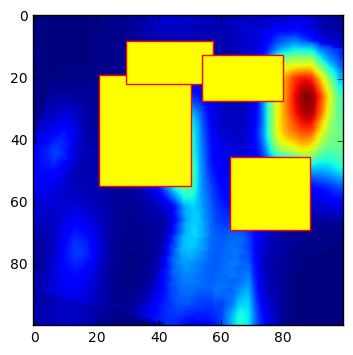

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
141.12340766688607 21.89777576199988


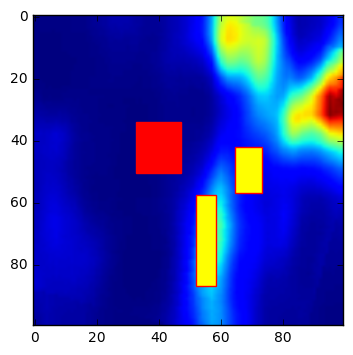

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
12.327214231644685 17.78464276927311


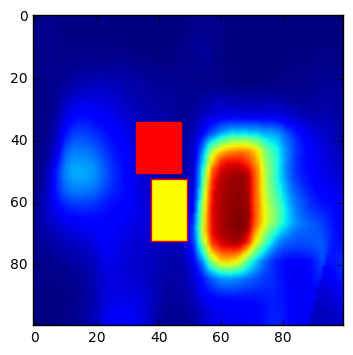

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
43.09651941645007 16.540180841785507


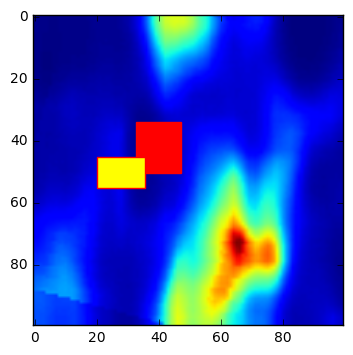

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
44.53883191645009 16.496522960277666


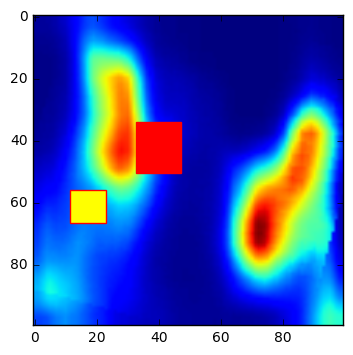

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
561.3939805835591 30.15042020985717


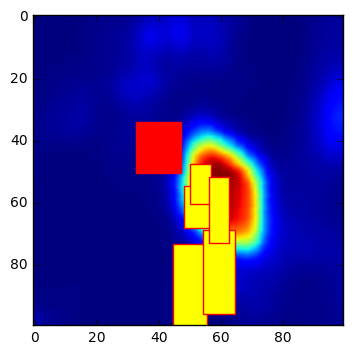

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
123.32705350021911 21.279521894836567


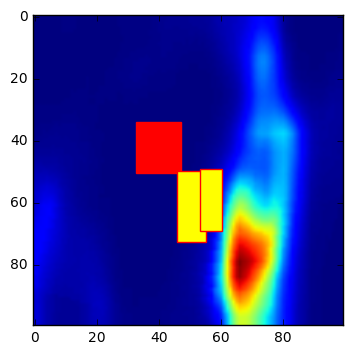

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
5.411909343692905 18.51761873982896


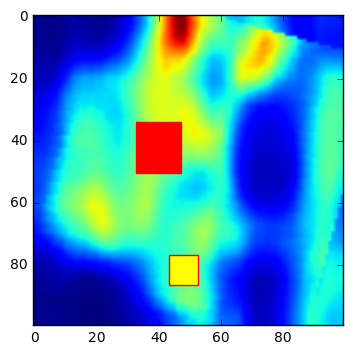

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
43.79417566645008 16.51907763856591


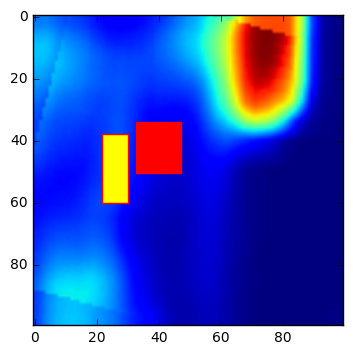

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
12.018258999782937 17.7976670178552


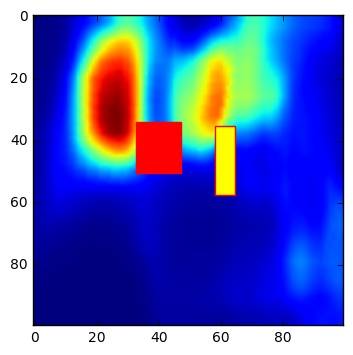

In [32]:
results = model.predict(X_train, batch_size=10)
for p in range(10):
    plot_rect(X_train[p]*255,results[p],Y_train[p])

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
12.54263068441831 17.775556074325713


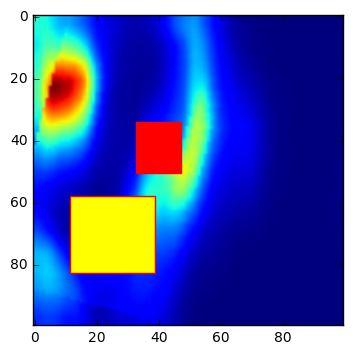

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
10.635949911064287 18.728007492649123


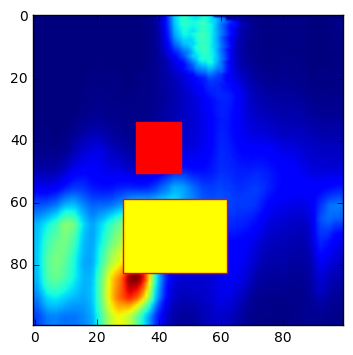

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
35.73119302756232 16.76864783567184


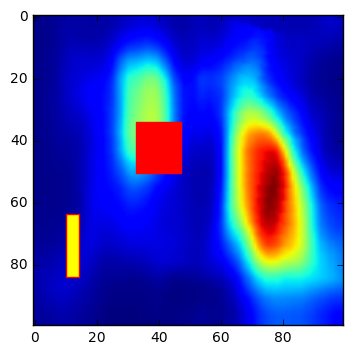

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
23.0923041386734 17.324718859771295


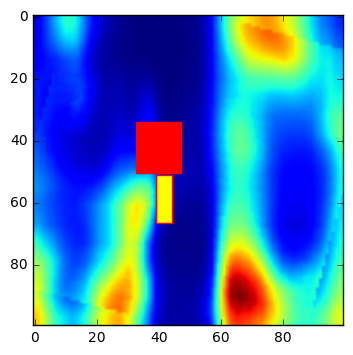

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
14.411748583117834 17.696517083975834


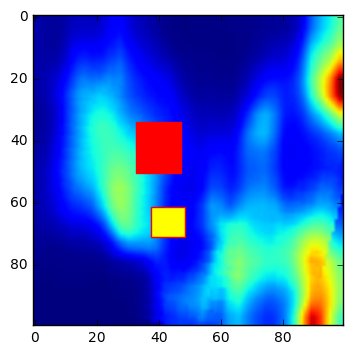

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
21.202877529134135 19.14650506154652


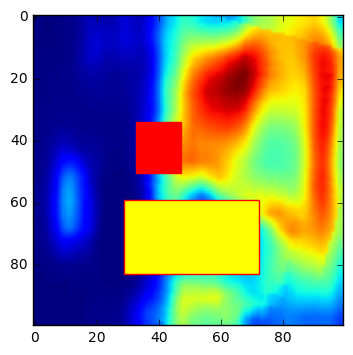

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
20.26986931558178 19.109922651635667


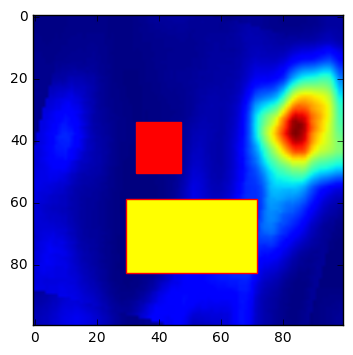

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
12.283711279900857 17.78647724700633


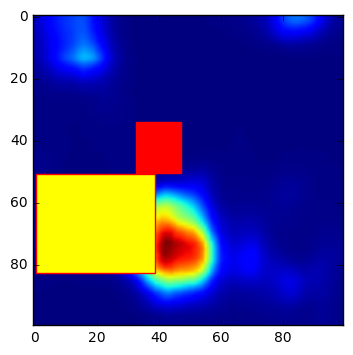

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
14.021123583117832 17.71306451192025


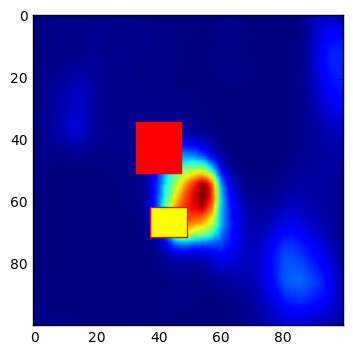

[[  3.25168686e+01   3.37425117e+01   1.47871218e+01   1.65718536e+01]
 [  8.34551430e+00   8.19800663e+00   3.45178795e+00   4.28651953e+00]
 [  2.86203074e+00   2.23480320e+00   1.08866310e+00   8.53608251e-01]
 [  1.57821643e+00   6.70580268e-01   7.69265056e-01   8.27331781e-01]
 [  3.27252984e-01   1.68399170e-01   3.22304279e-01   3.11096489e-01]
 [ -1.68740749e-02   7.02714920e-03  -1.35138720e-01   7.00816512e-02]]
True
32.5169 33.7425 14.7871 16.5719
False
8.34551 8.19801 3.45179 4.28652
False
2.86203 2.2348 1.08866 0.853608
False
1.57822 0.67058 0.769265 0.827332
False
0.327253 0.168399 0.322304 0.311096
False
-0.0168741 0.00702715 -0.135139 0.0700817
19.44647080534007 17.481837248130276


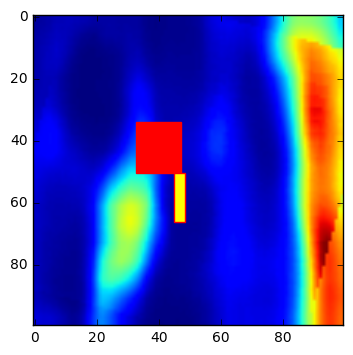

In [33]:
results = model.predict(X_test, batch_size=10)
for p in range(10):
    plot_rect(X_test[p]*255,results[p],Y_test[p])